In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import defaultdict
import random

In [2]:
def show_board(board_state):
    fig, ax = plt.subplots(figsize=(8,8))
    #Draw lines
    ax.plot([0, 3], [1, 1], 'k-', linewidth=5)
    ax.plot([0, 3], [2, 2], 'k-', linewidth=5)
    ax.plot([1, 1], [0, 3], 'k-', linewidth=5)
    ax.plot([2, 2], [0, 3], 'k-', linewidth=5)
    
    ax.set_xlim(0,3)
    ax.set_ylim(0,3)
    
    #Draw markers
    for i in range(9):
        if board_state[i]:
            x = i % 3 + 0.5
            y = i // 3 + 0.5
            if board_state[i] > 0:
                marker = 'rx'
            else:
                marker = 'bo'
            ax.plot([x], [y], marker, markersize=55, mfc='none', linewidth=4)

In [3]:
def half():
    return 0.5
X_table = defaultdict(half)
O_table = defaultdict(half)

In [4]:
def make_x_move(board_state, t=0):
    alpha = 0.5
    explore_prob = 0.30*np.exp(-t / 10000)
    possible_moves = np.where(board_state == 0)[0]
    if len(possible_moves) == 9:
        return random.choice(possible_moves)
    if explore_prob > random.uniform(0,1):
        choice = random.choice(possible_moves)
    else:
        moves, scores = [], []
        for i in possible_moves:
            new_state = board_state.copy()
            new_state[i] = 1
            moves.append(i)
            scores.append(X_table[tuple(new_state)])
        try: move_choices = [moves[i] for i in range(len(moves)) if scores[i] == max(scores)]
        except: print(moves, scores, possible_moves)
        choice = random.choice(move_choices)
    return choice
        
def make_o_move(board_state, t=0):
    alpha = 0.5
    explore_prob = 0.30*np.exp(-t / 10000)
    possible_moves = np.where(board_state == 0)[0]
    if explore_prob > random.uniform(0,1):
        choice = random.choice(possible_moves)
    else:
        moves, scores = [], []
        for i in possible_moves:
            new_state = board_state.copy()
            new_state[i] = -1
            moves.append(i)
            scores.append(O_table[tuple(new_state)])
        move_choices = [moves[j] for j in range(len(moves)) if scores[j] == max(scores)]
        choice = random.choice(move_choices)
    return choice

In [5]:
def check_win(bs):
    #Check rows
    if (sum(bs[:3]) == 3) or (sum(bs[3:6]) == 3) or (sum(bs[6:]) == 3):
        return 1
    elif (sum(bs[:3]) == -3) or (sum(bs[3:6]) == -3) or (sum(bs[6:]) == -3):
        return -1
    #check columns
    if (sum(bs[::3]) == 3) or (sum(bs[1::3]) == 3) or (sum(bs[2::3]) == 3):
        return 1
    elif (sum(bs[::3]) == -3) or (sum(bs[1::3]) == -3) or (sum(bs[2::3]) == -3):
        return -1
    #Check Diagonals
    d1 = bs[0] + bs[4] + bs[8]
    d2 = bs[2] + bs[4] + bs[6]
    if d1 == 3 or d2 == 3:
        return 1
    elif d1 == -3 or d2 == -3:
        return -1
    
    return 0

In [6]:
def run_game(t):
    
    states = []
    winner = False
    alpha = 0.9
    board = np.zeros(9)
    tied = False
    while not winner:
        X = make_x_move(board,t)
        board[X] = 1
        states.append(tuple(board))
        winner = check_win(board)
        if winner:
            break
            
        if 0 not in board:
            tied = True
            break
            
        O = make_o_move(board,t)
        board[O] = -1
        states.append(tuple(board))
        winner = check_win(board)
        if 0 not in board:
            tied = True
            break
            
            
    #show_board(board)
    table = {1: X_table, -1: O_table}
    assert len(states) > 4, "Too few states for valid game"
    
    
    if not tied:
        cur_player = int(winner)
        table[cur_player][states[-1]] = 1
        table[-cur_player][states[-2]] = 0
    if tied:
        if sum(board) > 0:
            cur_player = 1
        else: cur_player = -1
        table[cur_player][states[-1]] = 0.95
        table[-cur_player][states[-2]] = 0.95
    k = len(states) - 3
    while k >= 0:
        cur_state = states[k]
        next_state = states[k+2]
        table[cur_player][cur_state] = table[cur_player][cur_state] + alpha *(table[cur_player][next_state] - table[cur_player][cur_state])
        cur_player = -cur_player
        k -= 1
    
    return winner, board

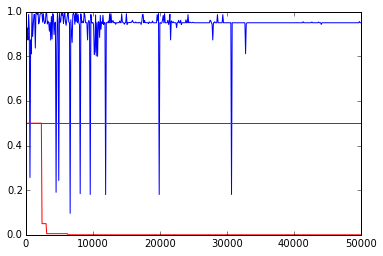

In [7]:
n = 0
ng = []
prob = []
states = tuple(np.array([0.0, 0, 0,
                         0, 1.0, 0,
                         0, 0 ,0]))
state2 = tuple(np.array([1.0, 0.0, -1.0,
                         0, -1.0, -1.0,
                         1.0, 1.0 ,0]))
state3 = tuple(np.array([1.0, -1.0, 1.0,
                         0, -1.0, 0,
                         0, 0 ,1.0]))
prob2, prob3 = [], []
for k in range(50000):
    n += 1
    if n % 100 == 0:
        ng.append(n)
        prob.append(X_table[states])
        prob2.append(X_table[state2])
        prob3.append(X_table[state3])
    run_game(k)
plt.plot(ng, prob)
plt.plot(ng, prob2)
plt.plot(ng, prob3)

   |     |   
   |     |   
   |     |   
O prob 0.500
   |     |   
   |     |   
X  |     |   
X prob 0.950
Make o: 4


C:\Users\ekish\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:36: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


   |     |   
   |  O  |   
X  |     |   
O prob 0.950
   |     |   
   |  O  |  X
X  |     |   
X prob 0.950
Make o: 0
O  |     |   
   |  O  |  X
X  |     |   
O prob 0.000
O  |     |   
   |  O  |  X
X  |     |  X
X prob 1.000
Make o: 2
O  |     |  O
   |  O  |  X
X  |     |  X
O prob 0.000
X wins!


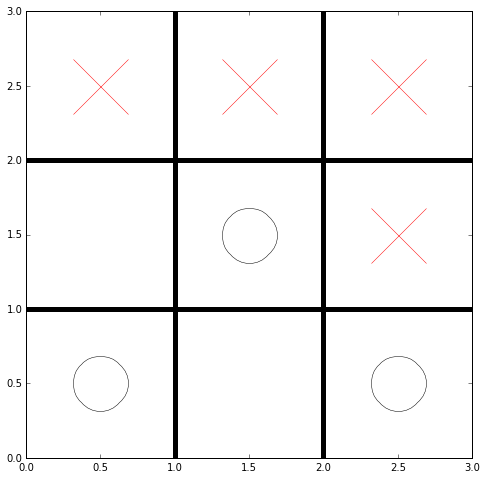

In [8]:
PLAY_AS = 'O'
#Spaces numbered as:
# 0 | 1 | 2
# 3 | 4 | 5
# 6 | 7 | 8

new_game = np.zeros(9)
mapping = {1.0: 'X', -1.0: 'O', 0.0 : ' '}
while 0 in new_game or not check_win(new_game):
    for i in [0,3,6]:
        print (mapping[new_game[i]], ' | ', mapping[new_game[i+1]], ' | ', mapping[new_game[i+2]])
    print('O prob {0:.3f}'.format(O_table[tuple(new_game)]))
    
    if PLAY_AS == 'O':
        x = make_x_move(new_game,999999999)
    else:
        x = input('Make x:')
        
    new_game[x] = 1
    if 0 not in new_game:
        print("Tie game!")
        break
    elif check_win(new_game):
        print("X wins!")
        break
        
    for i in [0,3,6]:
        print (mapping[new_game[i]], ' | ', mapping[new_game[i+1]], ' | ', mapping[new_game[i+2]])
    print('X prob {0:0.3f}'.format(X_table[tuple(new_game)]))
    
    
    if PLAY_AS == 'X':
        o = make_o_move(new_game,999999999)
    else:
        o = input('Make o: ')
    new_game[o] = -1
show_board(new_game)